<a href="https://colab.research.google.com/github/eresytter/bluewhale/blob/main/Blue_Whale_wikipedia_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bs4
!pip install requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import nltk

In [2]:
source = urlopen("https://en.wikipedia.org/wiki/Blue_whale").read()
soup = BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Blue whale - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBjxtwpAICkAACaqK2AAAAAC","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Blue_whale","wgTitle":"Blue whale","wgCurRevisionId":1003377725,"wgRevisionId":1003377725,"wgArticleId":4925,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 maint: multiple names: authors list","CS1 Spanish-language sources (es)","Articles with short description","Short description is different from Wikidata","Wikiped

In [3]:
# Extract plain text content from paragraphs
text = ''
for paragraph in soup.find_all('p'):
  text += paragraph.text
text

'\nThe blue whale (Balaenoptera musculus) is a marine mammal belonging to the baleen whale suborder Mysticeti. Reaching a maximum confirmed length of 29.9 meters (98 feet) and weight of 173 tonnes (190 tons), it is the largest animal known to have ever existed. The blue whale’s long and slender body can be various shades of grayish-blue dorsally and somewhat lighter underneath.\nThere are currently five subspecies of blue whale, recognized by the Society for Marine Mammalogy’s Committee on Taxonomy: B. m. musculus in the North Atlantic and North Pacific, B. m. intermedia in the Southern Ocean, B. m. brevicauda (the pygmy blue whale) in the Indian Ocean and South Pacific Ocean, B. m. indica in the Northern Indian Ocean, and B. m. unnamed subsp. in the waters off Chile. The blue whale diet consists almost exclusively of euphausiids (krill).\nThe blue whale was once abundant in nearly all the oceans on Earth until the end of the 19th century. It was hunted almost to the point of extinctio

In [4]:
# We can see that there are newline symbols \n and reference hyperlinks e.g. [10], we need to remove these
text = re.sub(r'\[.*?\]+', '', text) # <-- removes wikipedia hyperlinks
text = text.replace('\n', '') # <-- removes exactly "\n"

In [5]:
from nltk.tokenize import word_tokenize
nltk.download('punkt') #mandatory for word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip install clean-text[gpl] #text quick clean with cleantext https://pypi.org/project/clean-text/
from cleantext import clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
tokenized_text = word_tokenize(text) #tokenizing it with nltk https://www.nltk.org/api/nltk.tokenize.html
stop_words = set(stopwords.words('english'))
final_token = [w for w in tokenized_text if not w in stop_words]
filtered_sentence = []
for w in tokenized_text:
  if w not in stop_words:
    filtered_sentence.append(w)
print(tokenized_text)
print(filtered_sentence)

['the', 'blue', 'whale', 'balaenoptera', 'musculus', 'is', 'a', 'marine', 'mammal', 'belonging', 'to', 'the', 'baleen', 'whale', 'suborder', 'mysticeti', 'reaching', 'a', 'maximum', 'confirmed', 'length', 'of', '299', 'meters', '98', 'feet', 'and', 'weight', 'of', '173', 'tonnes', '190', 'tons', 'it', 'is', 'the', 'largest', 'animal', 'known', 'to', 'have', 'ever', 'existed', 'the', 'blue', 'whales', 'long', 'and', 'slender', 'body', 'can', 'be', 'various', 'shades', 'of', 'grayishblue', 'dorsally', 'and', 'somewhat', 'lighter', 'underneaththere', 'are', 'currently', 'five', 'subspecies', 'of', 'blue', 'whale', 'recognized', 'by', 'the', 'society', 'for', 'marine', 'mammalogys', 'committee', 'on', 'taxonomy', 'b', 'm', 'musculus', 'in', 'the', 'north', 'atlantic', 'and', 'north', 'pacific', 'b', 'm', 'intermedia', 'in', 'the', 'southern', 'ocean', 'b', 'm', 'brevicauda', 'the', 'pygmy', 'blue', 'whale', 'in', 'the', 'indian', 'ocean', 'and', 'south', 'pacific', 'ocean', 'b', 'm', 'indi

In [20]:
clean_text = clean(filtered_sentence, no_punct=True, lower=True) 
clean_text = word_tokenize(clean_text) #apparently clean_text also reverts back list to strings, so I've got to tokenize it again
print(clean_text)

['blue', 'whale', 'balaenoptera', 'musculus', 'marine', 'mammal', 'belonging', 'baleen', 'whale', 'suborder', 'mysticeti', 'reaching', 'maximum', 'confirmed', 'length', '299', 'meters', '98', 'feet', 'weight', '173', 'tonnes', '190', 'tons', 'largest', 'animal', 'known', 'ever', 'existed', 'blue', 'whales', 'long', 'slender', 'body', 'various', 'shades', 'grayishblue', 'dorsally', 'somewhat', 'lighter', 'underneaththere', 'currently', 'five', 'subspecies', 'blue', 'whale', 'recognized', 'society', 'marine', 'mammalogys', 'committee', 'taxonomy', 'b', 'musculus', 'north', 'atlantic', 'north', 'pacific', 'b', 'intermedia', 'southern', 'ocean', 'b', 'brevicauda', 'pygmy', 'blue', 'whale', 'indian', 'ocean', 'south', 'pacific', 'ocean', 'b', 'indica', 'northern', 'indian', 'ocean', 'b', 'unnamed', 'subsp', 'waters', 'chile', 'blue', 'whale', 'diet', 'consists', 'almost', 'exclusively', 'euphausiids', 'krillthe', 'blue', 'whale', 'abundant', 'nearly', 'oceans', 'earth', 'end', '19th', 'cent

In [21]:
freqtoken = nltk.FreqDist(clean_text) #Iterate Frequency Distribution across tokens
print(freqtoken)

<FreqDist with 1792 samples and 4438 outcomes>


In [22]:
# Let's take a look on frequencies of each token
for k,v in freqtoken.items():
  print(str(k)+':'+str(v))

blue:179
whale:101
balaenoptera:9
musculus:8
marine:12
mammal:2
belonging:1
baleen:7
suborder:1
mysticeti:1
reaching:1
maximum:5
confirmed:3
length:9
299:2
meters:2
98:2
feet:1
weight:5
173:1
tonnes:1
190:1
tons:11
largest:4
animal:4
known:10
ever:2
existed:1
whales:137
long:8
slender:4
body:6
various:1
shades:1
grayishblue:2
dorsally:1
somewhat:2
lighter:1
underneaththere:1
currently:4
five:4
subspecies:29
recognized:8
society:3
mammalogys:3
committee:4
taxonomy:2
b:29
north:54
atlantic:21
pacific:38
intermedia:3
southern:18
ocean:30
brevicauda:7
pygmy:32
indian:19
south:24
indica:6
northern:11
unnamed:1
subsp:1
waters:12
chile:4
diet:2
consists:2
almost:3
exclusively:2
euphausiids:2
krillthe:1
abundant:1
nearly:4
oceans:2
earth:1
end:1
19th:2
century:1
hunted:2
point:2
extinction:2
whaling:20
international:13
commission:8
banned:3
hunting:3
1967:2
catch:3
database:3
estimates:9
382595:2
caught:7
1868:2
1978:4
global:2
population:53
estimated:15
1000025000:2
roughly:10
311:3
size:6
19

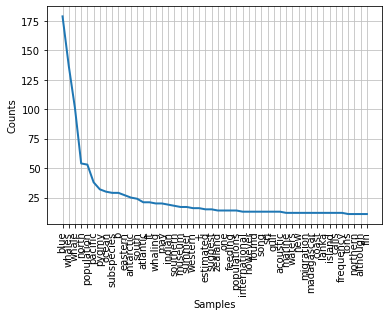

In [23]:
freqtoken.plot(50, cumulative=False)

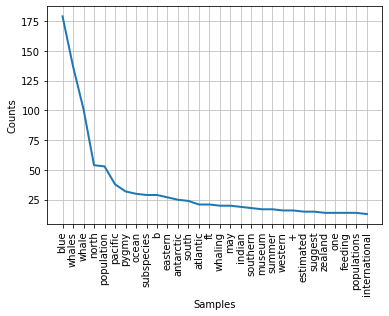

In [26]:
freqtoken.plot(30, cumulative=False) #freqdist with only 30 top tokens

In [27]:
import csv
import pandas as pd
fdist = nltk.FreqDist(filtered_sentence)
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)
df_fdist.to_csv("bluewhale.csv")

              Frequency
Term                   
blue                179
whale               101
balaenoptera          9
musculus              8
marine               12
...                 ...
flora                 1
migratory             1
enough                1
information           1
critically            1

[1792 rows x 1 columns]


In [28]:
df = pd.read_csv('bluewhale.csv')
df.head()

,Term,Frequency
0,blue,179
1,whale,101
2,balaenoptera,9
3,musculus,8
4,marine,12


In [35]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def plot_cloud(wordcloud): # declare the wordcloud figure
  # Set figure size
  plt.figure(figsize=(40, 30))
  # Display image
  plt.imshow(wordcloud)
  # No axis details
  plt.axis("off");

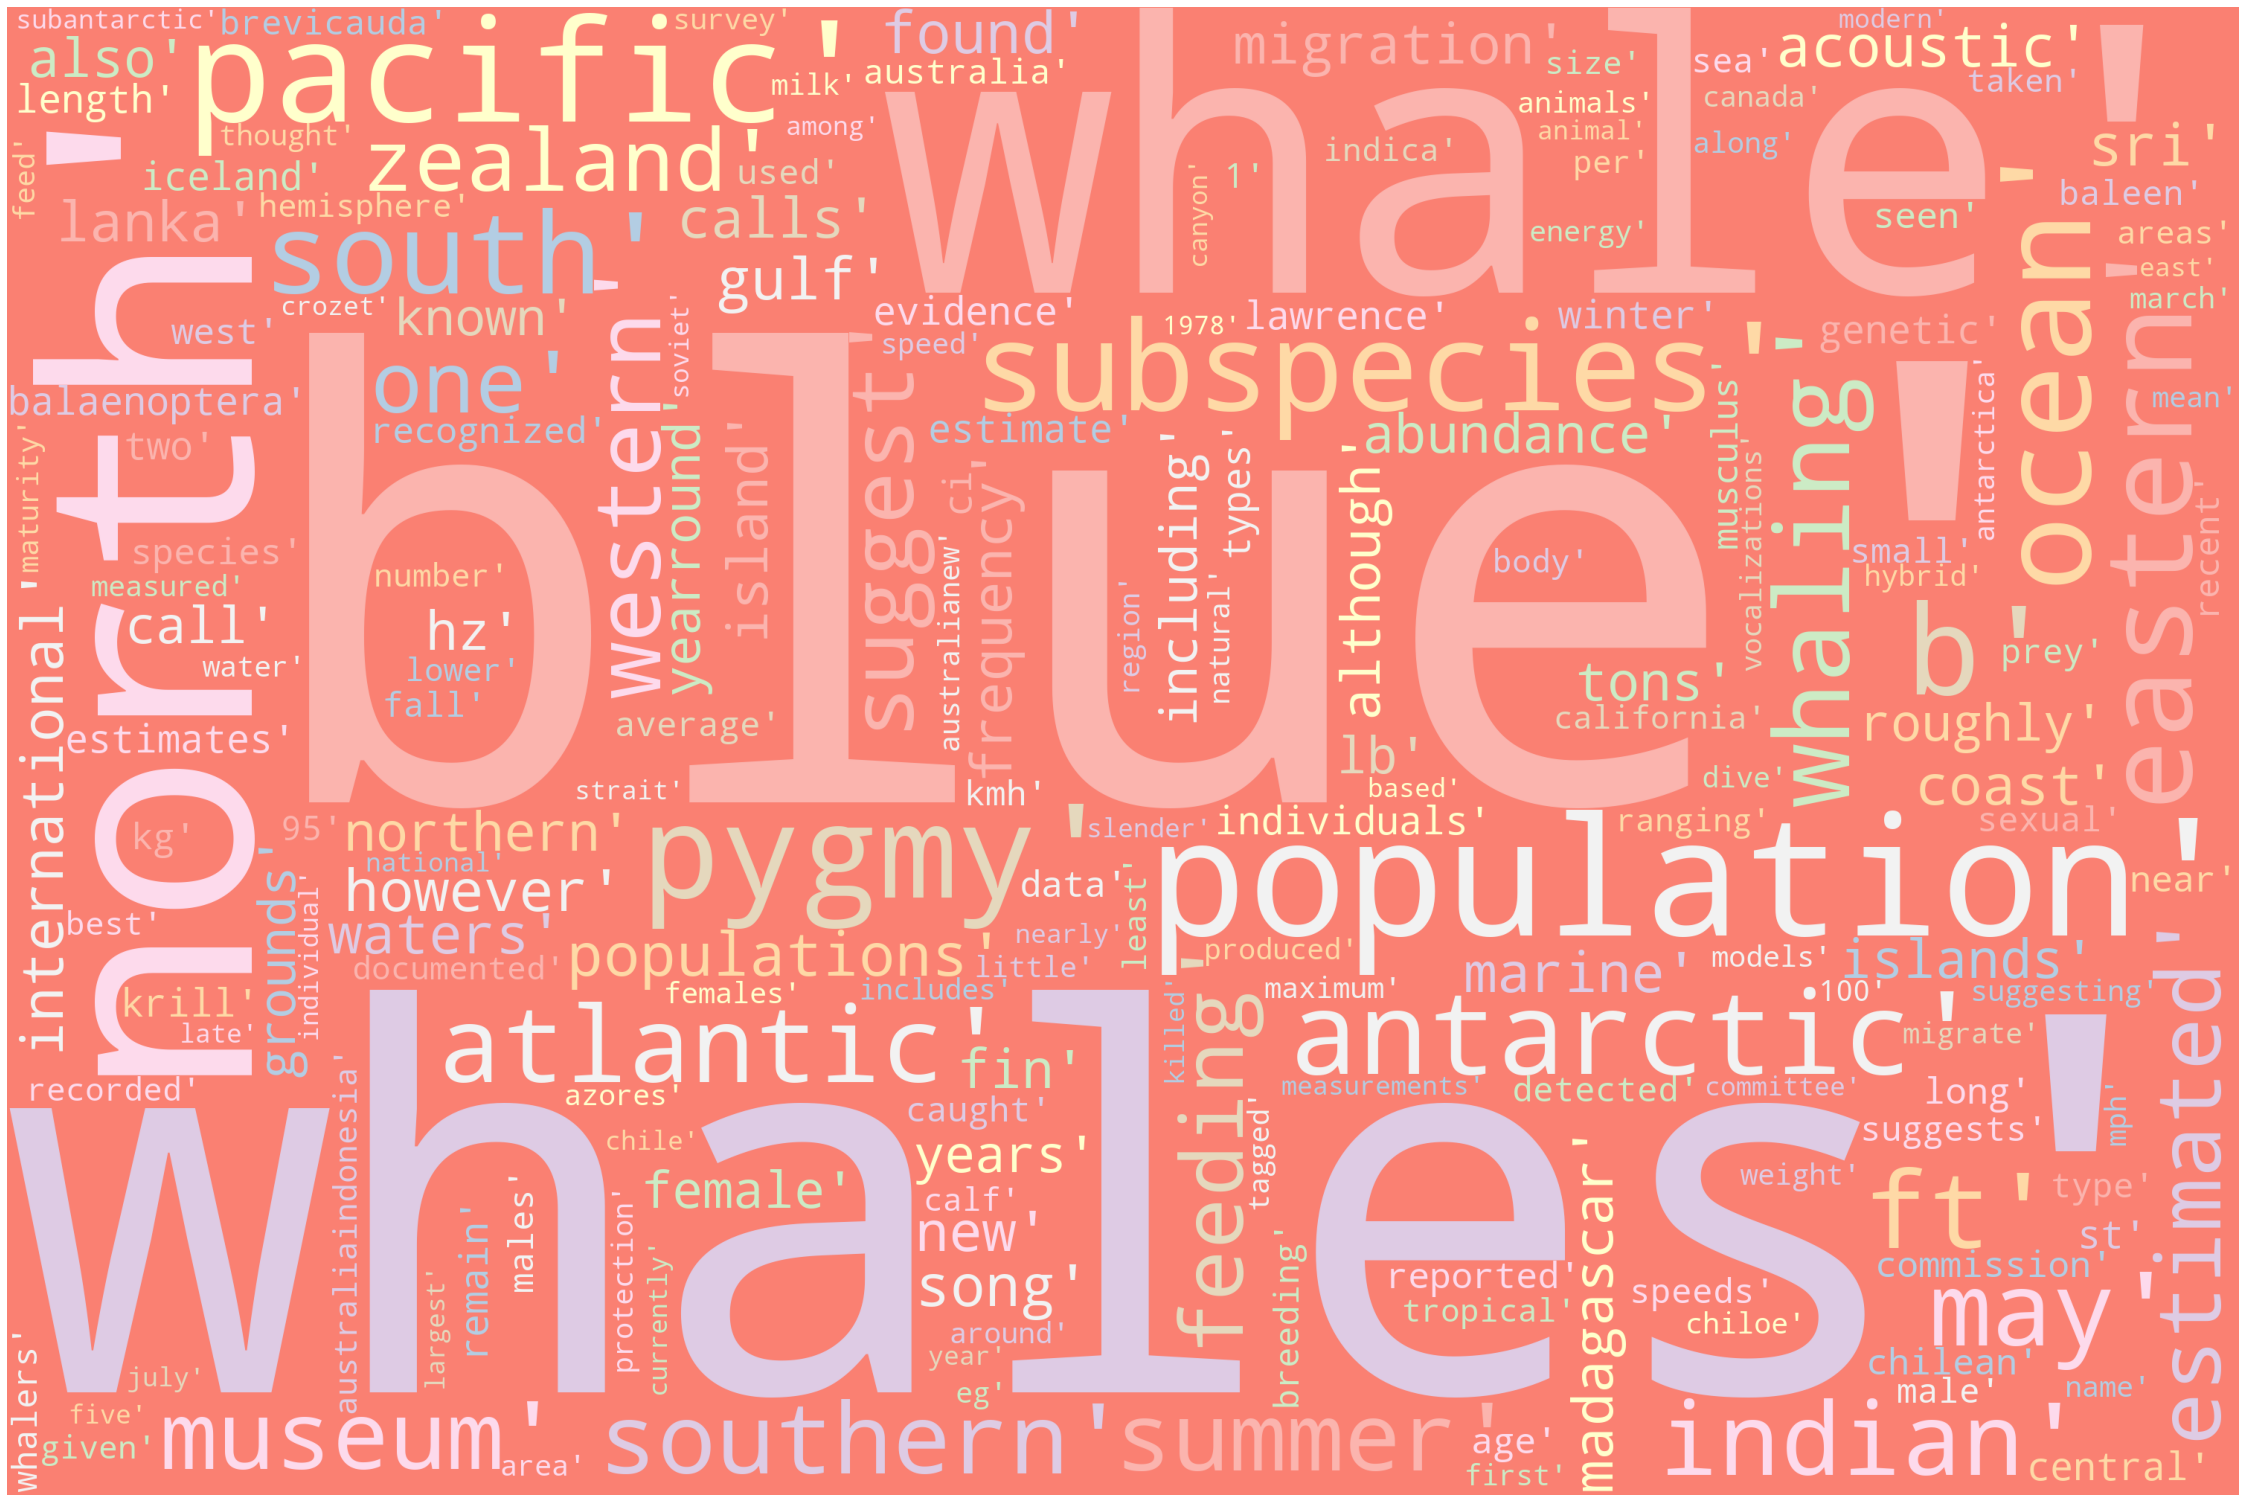

In [41]:
wordcloud_text = str(clean_text) #WordCloud apparently expects str objects so I need to convert it to str
wordcloud = WordCloud(width = 3000, height=2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(wordcloud_text)
plot_cloud(wordcloud)